# Deep learning course
## Self Organizing Maps
site : https://github.com/JustGlowing/minisom


In [106]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10651 sha256=596a58f8578a5943e9238069af942280702b12f96153deff6abb6fa6857e00eb
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [108]:
from minisom import MiniSom
import numpy as np
from matplotlib.pyplot import pcolor, colorbar, plot
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler


In [110]:
df = pd.read_csv('wines.csv')
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [112]:
df.iloc[:, 0:14].values

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [143]:
x = df.iloc[:, 1:14].values
y = df.iloc[:, 0].values

In [144]:
# scale normalization
sc = MinMaxScaler(feature_range = (0,1))
x = sc.fit_transform(x)
x

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [118]:
len(x[0])

13

In [180]:
# x and y seize of matrix,  # initialization of 6x6 SOM
input_len = len(x[0])
som = MiniSom(x=10, y=10,
              input_len=input_len,
              sigma=1.0,
              learning_rate=0.5,
              random_seed = 2)
som.random_weights_init(x)
som.train(data=x, num_iteration=1000) # trains the SOM with 100 iterations

In [181]:
som._weights

array([[[0.42212298, 0.10991981, 0.23539219, ..., 0.53952214,
         0.4278855 , 0.15955318],
        [0.26241366, 0.2955683 , 0.31532393, ..., 0.3827463 ,
         0.54141195, 0.14176069],
        [0.33737404, 0.15987645, 0.42763999, ..., 0.28631823,
         0.60011673, 0.04480171],
        ...,
        [0.16571878, 0.40203259, 0.37140173, ..., 0.30888329,
         0.59906256, 0.24307815],
        [0.51954139, 0.27515442, 0.60442551, ..., 0.47027682,
         0.6615378 , 0.568592  ],
        [0.73646484, 0.20284107, 0.63938545, ..., 0.59670123,
         0.67430825, 0.74458663]],

       [[0.32518128, 0.13337702, 0.32018253, ..., 0.61779627,
         0.64566008, 0.15993451],
        [0.31660245, 0.18380092, 0.36471141, ..., 0.4304367 ,
         0.74345689, 0.19208639],
        [0.36042625, 0.18601469, 0.48270494, ..., 0.42875874,
         0.6544582 , 0.08686867],
        ...,
        [0.33955979, 0.11628881, 0.35302632, ..., 0.53943786,
         0.50514325, 0.37680803],
        [0.4

In [147]:
som._activation_map

array([[0.67696363, 0.8331032 , 0.74972116, 0.84041921, 0.78466132,
        0.78508959, 0.7875115 , 0.84204819, 0.91426296, 1.09579508],
       [0.77528057, 1.01826075, 0.66655669, 0.88342093, 0.90935284,
        1.02816188, 1.079777  , 1.15292176, 0.80268944, 0.71711581],
       [0.8582078 , 0.94428947, 0.8708531 , 0.77637617, 0.95708493,
        0.94158355, 1.19192813, 0.9967184 , 0.9260889 , 1.02232772],
       [1.23397972, 0.86616723, 0.90266086, 1.02366562, 0.86389214,
        1.05287815, 0.78793063, 0.92987515, 0.9456849 , 0.93563122],
       [0.9755439 , 1.28511022, 0.7397148 , 0.67643075, 1.06120397,
        0.99787531, 1.04179949, 1.11322547, 0.83848193, 0.68703838],
       [0.76244462, 1.0895909 , 0.91553536, 0.87413623, 1.16010532,
        0.93938023, 0.9699429 , 1.05420003, 1.06646879, 1.00169775],
       [0.92655949, 1.09113401, 0.898457  , 1.08367006, 1.06493663,
        1.19263498, 1.13058071, 1.25052863, 0.81661187, 0.92649377],
       [1.04660852, 1.18607305, 1.0903940

In [182]:
som._weights.shape

(10, 10, 13)

In [183]:
#euclidean activation distance
som.distance_map()

array([[0.23107455, 0.33043324, 0.3574077 , 0.41539859, 0.49865744,
        0.41032274, 0.50314134, 0.5563127 , 0.42621222, 0.22268442],
       [0.35530047, 0.5641253 , 0.61534602, 0.96077799, 0.87348327,
        0.67976455, 0.90253385, 0.95723229, 0.59779446, 0.27242469],
       [0.37757115, 0.5897523 , 0.78306822, 0.92289073, 0.66294623,
        0.80940887, 0.62384496, 0.590817  , 0.56266362, 0.22754069],
       [0.48159892, 0.63100024, 0.60935544, 0.57704861, 0.55109578,
        0.46908211, 0.51523609, 0.45927817, 0.45512473, 0.19767057],
       [0.38586816, 0.52666751, 0.6758292 , 0.45041369, 0.4820366 ,
        0.46240206, 0.61065267, 0.4984501 , 0.49977868, 0.30241696],
       [0.31090705, 0.48952957, 0.56881093, 0.51308978, 0.60302597,
        0.72855978, 0.73767526, 0.7012333 , 0.63709362, 0.32171606],
       [0.22899353, 0.53344744, 0.50036544, 0.75153506, 0.6976966 ,
        0.72732407, 0.74186668, 1.        , 0.78341869, 0.4989001 ],
       [0.25345439, 0.57165863, 0.5494480

In [184]:
som.distance_map().shape

(10, 10)

In [185]:
# transpose operation
som.distance_map().T

array([[0.23107455, 0.35530047, 0.37757115, 0.48159892, 0.38586816,
        0.31090705, 0.22899353, 0.25345439, 0.34360262, 0.26644433],
       [0.33043324, 0.5641253 , 0.5897523 , 0.63100024, 0.52666751,
        0.48952957, 0.53344744, 0.57165863, 0.58591638, 0.33220905],
       [0.3574077 , 0.61534602, 0.78306822, 0.60935544, 0.6758292 ,
        0.56881093, 0.50036544, 0.54944806, 0.57826324, 0.33174123],
       [0.41539859, 0.96077799, 0.92289073, 0.57704861, 0.45041369,
        0.51308978, 0.75153506, 0.80821656, 0.70371495, 0.46632516],
       [0.49865744, 0.87348327, 0.66294623, 0.55109578, 0.4820366 ,
        0.60302597, 0.6976966 , 0.77223909, 0.84717584, 0.47796074],
       [0.41032274, 0.67976455, 0.80940887, 0.46908211, 0.46240206,
        0.72855978, 0.72732407, 0.60987368, 0.73645805, 0.35897589],
       [0.50314134, 0.90253385, 0.62384496, 0.51523609, 0.61065267,
        0.73767526, 0.74186668, 0.57480927, 0.5089392 , 0.36995037],
       [0.5563127 , 0.95723229, 0.590817 

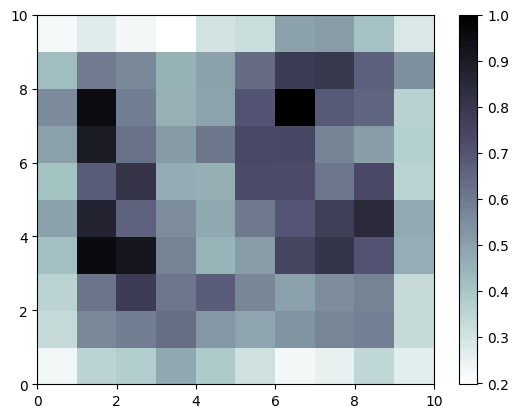

In [186]:
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()
plt.show()

In [187]:
x.shape

(178, 13)

In [188]:
#show neuron  (or node) in the map (number 177)  in the map that is closest to a given input data point.
som.winner(x[177])

(7, 7)

In [189]:
for index, value  in enumerate(x):
  w = som.winner(value)
  print('winner', w)
  print('value', value)

winner (3, 4)
value [0.84210526 0.1916996  0.57219251 0.25773196 0.61956522 0.62758621
 0.57383966 0.28301887 0.59305994 0.37201365 0.45528455 0.97069597
 0.56134094]
winner (3, 8)
value [0.57105263 0.2055336  0.4171123  0.03092784 0.32608696 0.57586207
 0.51054852 0.24528302 0.27444795 0.26450512 0.46341463 0.78021978
 0.55064194]
winner (0, 8)
value [0.56052632 0.3201581  0.70053476 0.41237113 0.33695652 0.62758621
 0.61181435 0.32075472 0.75709779 0.37542662 0.44715447 0.6959707
 0.64693295]
winner (6, 1)
value [0.87894737 0.23913043 0.60962567 0.31958763 0.4673913  0.98965517
 0.66455696 0.20754717 0.55835962 0.55631399 0.30894309 0.7985348
 0.85734665]
winner (2, 4)
value [0.58157895 0.36561265 0.80748663 0.53608247 0.52173913 0.62758621
 0.49578059 0.49056604 0.44479495 0.25938567 0.45528455 0.60805861
 0.32596291]
winner (7, 0)
value [0.83421053 0.20158103 0.5828877  0.2371134  0.45652174 0.78965517
 0.64345992 0.39622642 0.49211356 0.46672355 0.46341463 0.57875458
 0.83594864]


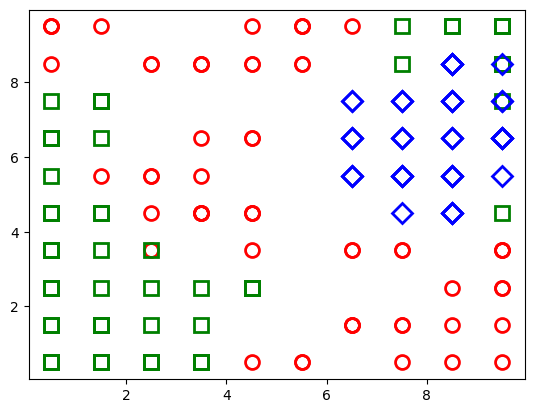

In [190]:
markers = ['o', 's', 'D']
colors = ['r', 'g','b']

for index, value in enumerate(x):
  w = som.winner(value) # coordenates
  plot(w[0] + 0.5,
       w[1] +0.5,
       markers[y[index]-1],
       markerfacecolor='None',
       markersize=10,
       markeredgecolor=colors[y[index]-1],
       markeredgewidth=2)
